__team-2__
* Anastasia Sobkevich
* Kateryna Repekh
* Khrystyna Hranishak
* Yehor Borkov

In [43]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as sts
import warnings; warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [44]:
data = pd.read_excel('data-team-2.xlsx', 'task-2-1', index_col=0)
data

,"Оптовий товарооборот, млн.грн","валовий внутрішній продукт, млн грн"
роки,,
2005,492506.2,457325
2006,631175.2,565018
2007,812160.5,751106
2008,998578.2,990819
2009,817532.4,947042
2010,993695.8,1120585
2011,1107283.4,1349178
2012,1093290.8,1459096
2013,1074753.2,1522657


## Sample characteristics of data

In [45]:
data.describe() # quick look at the data

,"Оптовий товарооборот, млн.грн","валовий внутрішній продукт, млн грн"
count,1.200000e+01,1.200000e+01
mean,9.840933e+05,1.260304e+06
std,2.786090e+05,5.718215e+05
min,4.925062e+05,4.573250e+05
25%,8.161894e+05,8.980580e+05
50%,9.961370e+05,1.234882e+06
75%,1.096789e+06,1.538722e+06
max,1.555966e+06,2.385367e+06


In [46]:
cc = pd.Series({'mean': data['Оптовий товарооборот, млн.грн'].mean(), 'var': data['Оптовий товарооборот, млн.грн'].var(), 'median': data['Оптовий товарооборот, млн.грн'].median(), 'iqr': data['Оптовий товарооборот, млн.грн'].quantile(0.75) - data['Оптовий товарооборот, млн.грн'].quantile(0.25)})
gdp = pd.Series({'mean': data['валовий внутрішній продукт, млн грн'].mean(), 'var': data['валовий внутрішній продукт, млн грн'].var(), 'median': data['валовий внутрішній продукт, млн грн'].median(), 'iqr': data['валовий внутрішній продукт, млн грн'].quantile(0.75) - data['валовий внутрішній продукт, млн грн'].quantile(0.25)})

In [47]:
print('Commodity circulations:')
cc

Commodity circulations:


mean      9.840933e+05
var       7.762299e+10
median    9.961370e+05
iqr       2.805995e+05
dtype: float64

In [48]:
print('Gross domestic product:')
gdp

Gross domestic product:


mean      1.260304e+06
var       3.269798e+11
median    1.234882e+06
iqr       6.406635e+05
dtype: float64

## Visual analysis

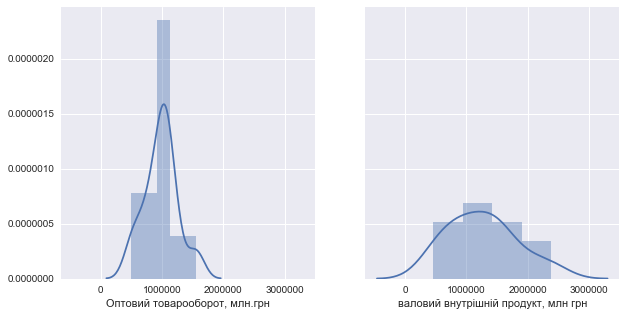

In [49]:
_, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
_ = sns.distplot(data['Оптовий товарооборот, млн.грн'], ax=axes[0]), sns.distplot(data['валовий внутрішній продукт, млн грн'], ax=axes[1])

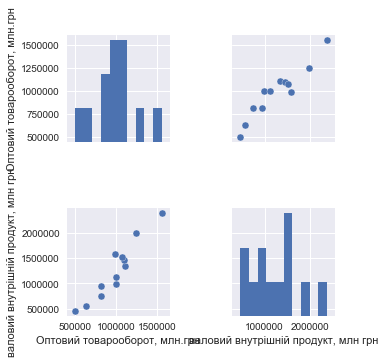

In [50]:
_ = sns.pairplot(data)

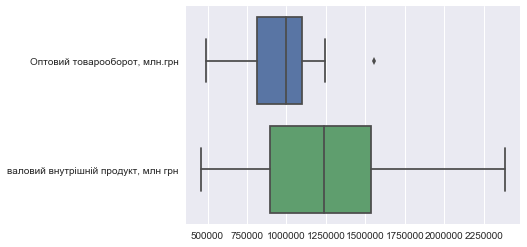

In [51]:
_ = sns.boxplot(data=data, orient='h')

## Correlation analysis  

Target significance level in our analysis -- 0.01.

__Pearson's correlation coefficient__

$H_0$ -- variables are uncorrelated.

In [52]:
pearson_corr_coef, pearson_p_value = sts.pearsonr(data['Оптовий товарооборот, млн.грн'], data['валовий внутрішній продукт, млн грн'])
print(f'Correlation coefficient: {np.round(pearson_corr_coef, 5)}, achieved p-value: {np.round(pearson_p_value, 10)}')

Correlation coefficient: 0.95016, achieved p-value: 2.2263e-06


We achieve high correlation coefficient and really low p-value (2.22e-06 < 0.01), so we can conclude, that variables are correlated.

__Spearman's correlation coefficient__

$H_0$ -- variables are uncorrelated.

In [53]:
spearman_corr_coef, spearman_p_value = sts.spearmanr(data['Оптовий товарооборот, млн.грн'], data['валовий внутрішній продукт, млн грн'])
print(f'Correlation coefficient: {np.round(spearman_corr_coef, 5)}, achieved p-value: {np.round(spearman_p_value, 10)}')

Correlation coefficient: 0.86014, achieved p-value: 0.0003316683


We achieve lower correlation coefficient than in Pearson's test. Dependence is not monotonic everywhere. Low p-value (0.00033 < 0.01), so we can conclude, that variables are correlated.

__Wilcoxon's test__

$H_0$ -- two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

In [54]:
wilcox_coef, wilcox_p_value = sts.wilcoxon(data['Оптовий товарооборот, млн.грн'], data['валовий внутрішній продукт, млн грн'])
print(f'Wilcoxons statistics: {np.round(wilcox_coef, 5)}, achieved p-value: {np.round(wilcox_p_value, 10)}')

Wilcoxons statistics: 10.0, achieved p-value: 0.0229090994


Although achieved p-value of 0.023 is greater than significance level of 0.01 and we should adopt $H_0$, we can't be confident in this result. 0.023 is not really significant: if significance level we target was 0.05, we would discard $H_0$. 

In [55]:
corr_table = data.corr()
corr_table

,"Оптовий товарооборот, млн.грн","валовий внутрішній продукт, млн грн"
"Оптовий товарооборот, млн.грн",1.000000,0.950163
"валовий внутрішній продукт, млн грн",0.950163,1.000000


## Fitting linear model

In [56]:
from scipy.stats import kstest
import statsmodels.api as sm
from statsmodels.stats import diagnostic
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [57]:
y = data['Оптовий товарооборот, млн.грн']
X = data['валовий внутрішній продукт, млн грн']
X = sm.add_constant(X)
X.head()

,const,"валовий внутрішній продукт, млн грн"
роки,,
2005,1.0,457325
2006,1.0,565018
2007,1.0,751106
2008,1.0,990819
2009,1.0,947042


In [58]:
regress_model = sm.OLS(y, X)
results = regress_model.fit()
print(f'Model coeficients:')
results.params

Model coeficients:


const                                  400637.064536
валовий внутрішній продукт, млн грн         0.462949
dtype: float64

In [59]:
results.summary() # no alpha shows that confidence interval for parameters is 95% 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Оптовий товарооборот, млн.грн   R-squared:                       0.903
Model:                                       OLS   Adj. R-squared:                  0.893
Method:                            Least Squares   F-statistic:                     92.89
Date:                           Fri, 29 Jun 2018   Prob (F-statistic):           2.23e-06
Time:                                   16:23:16   Log-Likelihood:                -152.97
No. Observations:                             12   AIC:                             309.9
Df Residuals:                                 10   BIC:                             310.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                4.006e+05    6.6e+04      6.070      0.000    2.54e+05    5.48e+05
валовий внутрішній продукт, млн грн     0.4629      0.048      9.638      0.000       0.356       0.570
==============================================================================
Omnibus:                        0.428   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.510
Skew:                          -0.201   Prob(JB):                        0.775
Kurtosis:                       2.073   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
print('The linear regression equation:')
print(f'y = {str(round(results.params[0], 2))} + {str(round(results.params[1], 2))} * x')

The linear regression equation:
y = 400637.06 + 0.46 * x


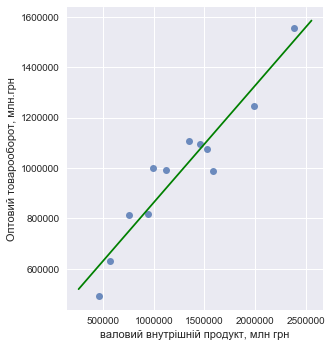

In [61]:
sns.lmplot('валовий внутрішній продукт, млн грн', 'Оптовий товарооборот, млн.грн', data=data, fit_reg=False)
gdp = np.arange(data['валовий внутрішній продукт, млн грн'].min() - 2e5, data['валовий внутрішній продукт, млн грн'].max() + 2e5, 1e5)
_ = plt.plot(gdp, results.params[0] + results.params[1] * gdp, 'g')

### Residuals analysis

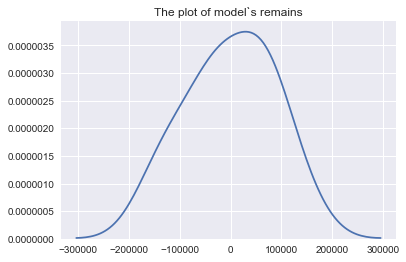

In [62]:
remains = results.resid
sns.distplot(remains, hist=False)
_ = plt.title('The plot of model`s remains')

In [63]:
kstest(remains, 'norm', args=(0, remains.std()))

KstestResult(statistic=0.13822300715826852, pvalue=0.9759034819952547)

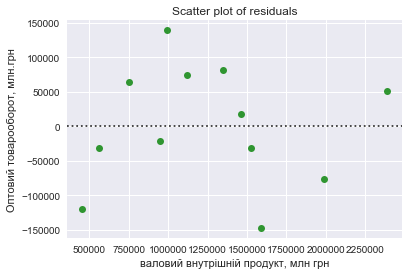

In [64]:
sns.residplot(X.iloc[:, 1], y, color = 'g')
_ = plt.title('Scatter plot of residuals')

In [65]:
_, _, _, p_value = diagnostic.het_breuschpagan(remains, X)
p_value

0.7338528185584049

In [66]:
x_new1 = [1, 2982920]
y_1 = results.predict(x_new1)
y_1

array([1781575.88100171])

In [67]:
wls_prediction_std(results, x_new1, alpha = 0.05)

(array([125843.83797973]),
 array([1501178.33631869]),
 array([2061973.42568473]))